In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import numpy as np
%matplotlib inline

In [39]:
# Step 1: Load and prepare the dataset
data = pd.read_csv('Mall_Customers.csv')


In [40]:
# Select features for clustering: Annual Income and Spending Score
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

In [41]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [42]:

# Step 2: Elbow Method to find optimal K
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

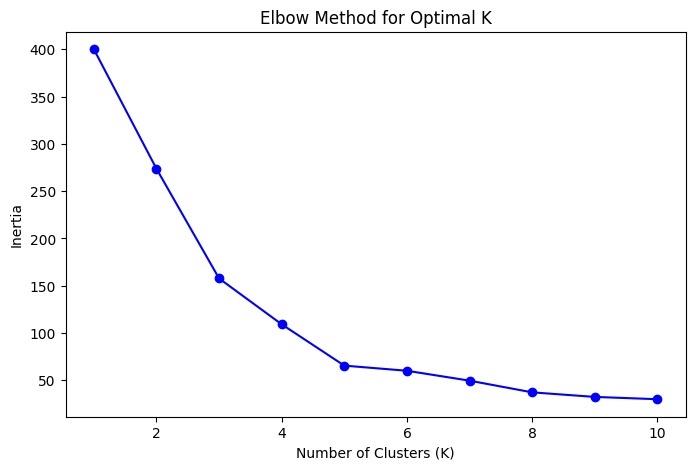

In [43]:

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [44]:

# Step 3: Fit K-Means with optimal K (assuming K=5 based on typical elbow curve for this dataset)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)


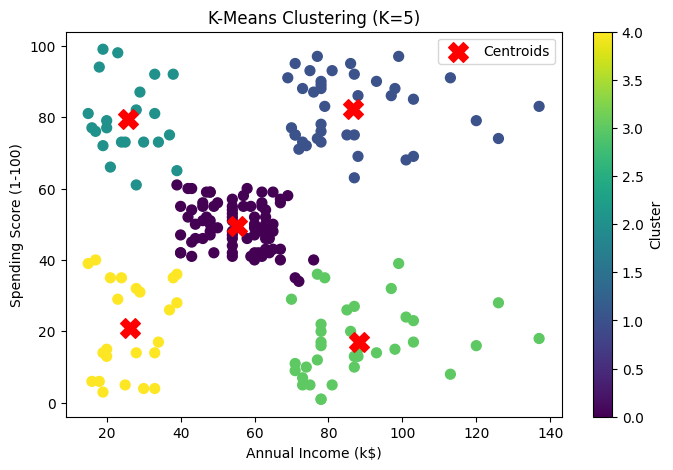

In [45]:
# Step 4: Visualize the clusters
plt.figure(figsize=(8, 5))
scatter = plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0] * scaler.scale_[0] + scaler.mean_[0], 
            kmeans.cluster_centers_[:, 1] * scaler.scale_[1] + scaler.mean_[1], 
            s=200, c='red', marker='X', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering (K=5)')
plt.legend()
plt.colorbar(scatter, label='Cluster')
plt.show()

In [46]:
# Step 5: Evaluate clustering using Silhouette Score
sil_score = silhouette_score(X_scaled, cluster_labels)
print(f'Silhouette Score for K={optimal_k}: {sil_score:.3f}')

Silhouette Score for K=5: 0.555


## With PCA

In [47]:
from sklearn.decomposition import PCA

In [48]:
# Select numerical features for clustering: Age, Annual Income, Spending Score
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

In [49]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [50]:
# Apply PCA to reduce to 2 components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_.sum()
print(f'Explained variance by 2 PCA components: {explained_variance:.3f}')# Apply PCA to reduce to 2 components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_.sum()
print(f'Explained variance by 2 PCA components: {explained_variance:.3f}')

Explained variance by 2 PCA components: 0.776
Explained variance by 2 PCA components: 0.776


In [51]:
# Step 2: Elbow Method to find optimal K
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)  # Cluster on scaled original features
    inertia.append(kmeans.inertia_)

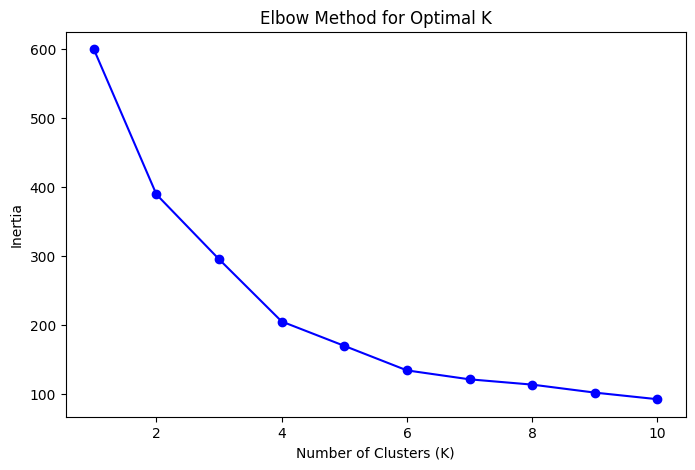

In [52]:

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [53]:
# Step 3: Fit K-Means with optimal K (assuming K=5 based on typical elbow curve)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)  # Cluster on scaled original features


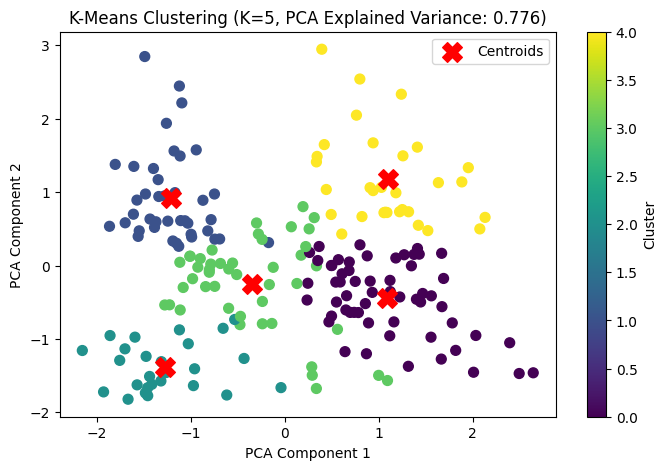

In [54]:
# Step 4: Visualize the clusters using PCA components
plt.figure(figsize=(8, 5))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], 
            pca.transform(kmeans.cluster_centers_)[:, 1], 
            s=200, c='red', marker='X', label='Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title(f'K-Means Clustering (K={optimal_k}, PCA Explained Variance: {explained_variance:.3f})')
plt.legend()
plt.colorbar(scatter, label='Cluster')
plt.show()

In [55]:
# Step 5: Evaluate clustering using Silhouette Score
sil_score = silhouette_score(X_scaled, cluster_labels)
print(f'Silhouette Score for K={optimal_k}: {sil_score:.3f}')

Silhouette Score for K=5: 0.408
